# FFT vs Pwelch

Fast Fourier Transform is a widely used mathematical technique in signal processing and other fields to analyze and transform signals from the time domain to the frequency domain.

**FFT is primarily used for frequency analysis**: It decomposes a signal into its constituent sinusoidal components at different frequencies. This is valuable for understanding the frequency content of a signal and identifying dominant frequencies or harmonics.

**Time-Domain to Frequency-Domain Transformation**: In the time domain, signals are represented as a function of time. FFT transforms this signal into the frequency domain, where it is represented as a function of frequency. This transformation is essential for various applications, including audio processing, image analysis, and vibration analysis.

**Spectrum Analysis**: The result of an FFT operation is often called a "frequency spectrum." This spectrum provides information about the amplitude and phase of the sinusoidal components present in the signal at different frequencies. It helps identify peaks in the spectrum, indicating the dominant frequencies in the signal.



**pwelch** stands for "Power Spectral Density (PSD) Estimate via Welch's Method,", it is used when you want to estimate the distribution of power in a signal as a function of frequency.

**Power Spectral Density (PSD)**: The power spectral density is a measure of how the power of a signal is distributed across different frequencies. It provides information about the signal's frequency content. In essence, it tells you how much power the signal contains at various frequencies.

**Welch's Method**: Welch's method is a technique for estimating the PSD of a signal from a finite set of data points. It divides the input signal into overlapping segments, computes the periodogram (the squared magnitude of the Fourier transform) for each segment, and then averages these periodograms to obtain a smoother estimate of the PSD.

In [1]:
from scipy.io import loadmat
hpc_continuous = loadmat('continuous/HPC_100_CH18_0.continuous.mat')
pfc_continuous = loadmat('continuous/PFC_100_CH22_0.continuous.mat')

In [2]:
hpc_continuous.keys()

dict_keys(['__header__', '__version__', '__globals__', 'HPC'])

In [3]:
pfc_continuous.keys()

dict_keys(['__header__', '__version__', '__globals__', 'PFC'])

In [4]:
hpc_signal = hpc_continuous['HPC'].flatten()
pfc_signal = pfc_continuous['PFC'].flatten()

In [5]:
hpc_signal

array([ 40.62872178,  52.89949603,  44.57601113, ..., 153.14986907,
       159.38136166, 160.77276103])

In [6]:
pfc_signal

array([ 10.57738713,  26.38347139,  21.90748099, ..., 159.53113327,
       140.68865626, 136.32161884])

## FFT Analysis

In [8]:
import numpy as np

fft_result = np.fft.fft(hpc_signal)

The fft_result will contain the complex-valued Fourier coefficients. If you are interested in the magnitude (power) of the FFT, you can calculate it as follows:

In [9]:
fft_magnitude = np.abs(fft_result)

Create a frequency axis to associate frequencies with the FFT result. You can use `fft.fftfreq` function for this purpose.

In [10]:
N = len(hpc_signal)
sampling_rate = 2500 

freq_axis = np.fft.fftfreq(N, 1.0 / sampling_rate)

## Visualize the FFT result

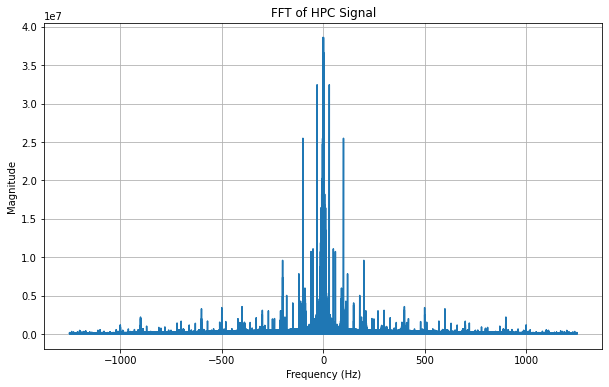

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(freq_axis, fft_magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of HPC Signal')
plt.grid()
plt.show()

## Pwelch Analysis

Use the `scipy.signal.welch` function to estimate the PSD of your HPC data. You can specify parameters such as the window type, overlap, and number of frequency bins.

In [ ]:
from scipy import signal

fs = 2500  # Sampling frequency (replace with your actual sampling rate)
nperseg = 256  # Length of each segment
noverlap = 128  # Overlap between segments
window = 'hamming'  # Window function (e.g., 'hamming', 'hann', 'blackman')

# Perform PSD estimation
frequencies, psd = signal.welch(hpc_data, fs=fs, nperseg=nperseg, noverlap=noverlap, window=window)
